In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xpts = np.random.uniform(0,10,5)
ypts = np.random.uniform(0,10,5)

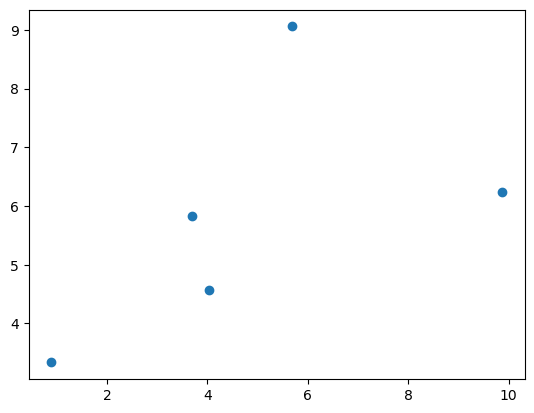

In [4]:
plt.scatter(xpts,ypts)

In [48]:
pts = np.array(list(zip(xpts,ypts)))
pts

array([[3.68346278, 5.82711482],
       [0.88842734, 3.3353408 ],
       [5.688529  , 9.05853965],
       [4.03085347, 4.57733507],
       [9.8661164 , 6.2350118 ]])

In [55]:
def ang_calc(pt):
    pt = np.array(pt)
    
    t = np.array([pt[1]-pt[0], pt[2]-pt[1]])
    if -np.linalg.det(t)>= 0:
        flag = True
    else :
        flag = False
    return flag

In [58]:
x = [0,0]
y = [0,1]
z = [-1,1]
ang_calc([x,y,z])

False

In [64]:
pt = np.array(sorted(pts, key = lambda k:[k[0]]))
pt

array([[0.88842734, 3.3353408 ],
       [3.68346278, 5.82711482],
       [4.03085347, 4.57733507],
       [5.688529  , 9.05853965],
       [9.8661164 , 6.2350118 ]])

In [193]:
def convexhull(xpts, ypts):
    pts = list(map(list,zip(xpts,ypts)))
    pt = (sorted(pts, key = lambda k:[k[0]]))
    stack = [pt[0],pt[1]]
    top3 =[]
    for i in pt[2:]:
        # if len(stack)<2:
        #     stack.append(i)
        # else:
        stack.append(i)
        top3 = [stack [-3], stack[-2], stack[-1]]
        tright = ang_calc(top3)
        print(stack)
        print(tright)
        if not(tright):
            stack.pop(-2)
            if len(stack)>2:
                top3 = [stack[-3], stack[-2], stack[-1]]
                tright = ang_calc(top3)
                if not(tright):
                    print(stack)
                    print(tright)
                    stack.pop(-2)
    return stack
       

[[1.3763227592876925, -1.6937398069463039], [1.7990103953142944, -8.10689601182223], [2.8558445046976813, -1.685696891925168]]
False
[[1.3763227592876925, -1.6937398069463039], [2.8558445046976813, -1.685696891925168], [3.3484011245488885, -4.718908060886459]]
True
[[1.3763227592876925, -1.6937398069463039], [2.8558445046976813, -1.685696891925168], [3.3484011245488885, -4.718908060886459], [4.744485724635407, -9.999994890238282]]
False
[[1.3763227592876925, -1.6937398069463039], [2.8558445046976813, -1.685696891925168], [4.744485724635407, -9.999994890238282], [6.368305784264735, -1.9807397669205695]]
False
[[1.3763227592876925, -1.6937398069463039], [2.8558445046976813, -1.685696891925168], [6.368305784264735, -1.9807397669205695], [7.566846805588916, -7.175310066764386]]
True
[[1.3763227592876925, -1.6937398069463039], [2.8558445046976813, -1.685696891925168], [6.368305784264735, -1.9807397669205695], [7.566846805588916, -7.175310066764386], [7.5779497861655205, -5.935139334921303]]

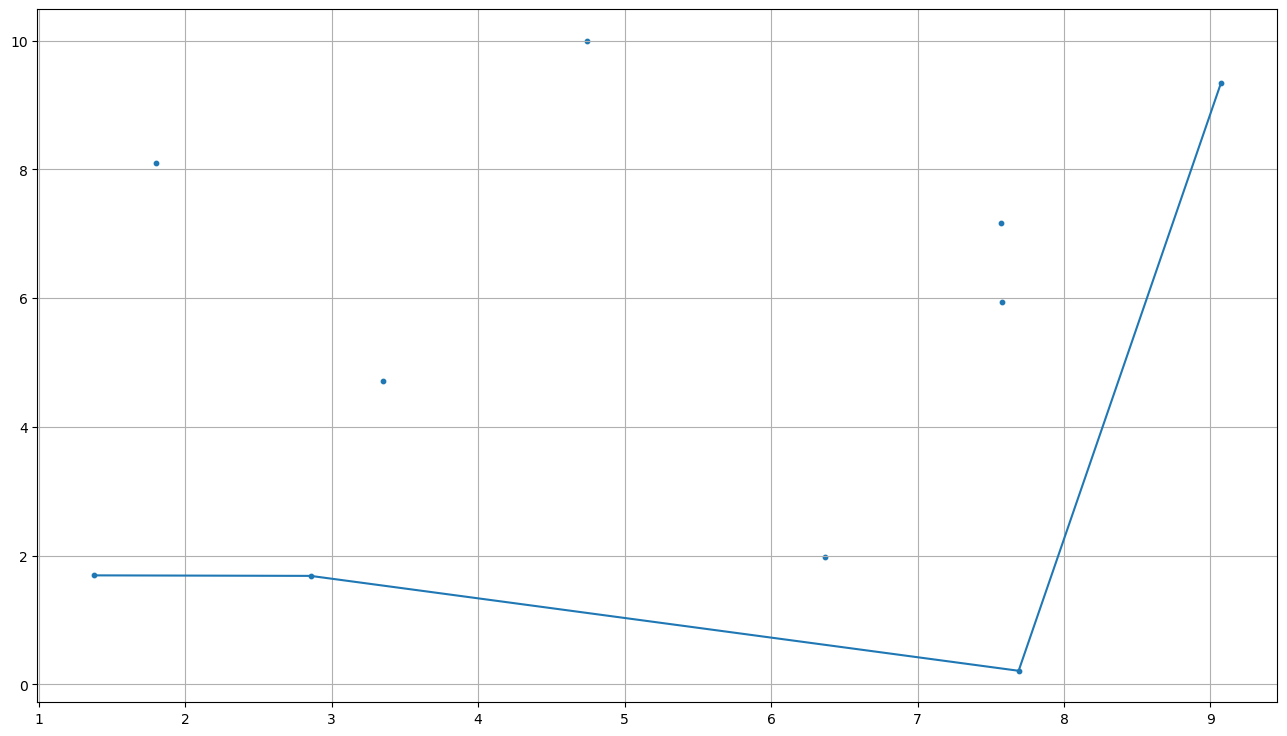

In [199]:
xpts = np.random.uniform(0,10,10)
ypts = np.random.uniform(0,10,10)

# stack = convexhull(xpts,ypts)
stackinv = convexhull(xpts, -ypts)
xhull = [i[0] for i in stack]
yhull = [i[1] for i in stack]
xhulli = [i[0] for i in stackinv]
yhulli = [-i[1] for i in stackinv]
fig,axes = plt.subplots(1,1,figsize=(16,9))

axes.scatter(xpts,ypts,s=10)
axes.grid()
# axes.plot(xhull, yhull)
axes.plot(xhulli, yhulli)

[array([0.88842734, 3.3353408 ]), array([3.68346278, 5.82711482]), array([4.03085347, 4.57733507])]
[array([0.88842734, 3.3353408 ]), array([3.68346278, 5.82711482]), array([4.03085347, 4.57733507])]
[4.03085347 4.57733507]
True
[array([3.68346278, 5.82711482]), array([4.03085347, 4.57733507]), array([5.688529  , 9.05853965])]
[array([0.88842734, 3.3353408 ]), array([3.68346278, 5.82711482]), array([5.688529  , 9.05853965])]
[5.688529   9.05853965]
False
[array([0.88842734, 3.3353408 ]), array([5.688529  , 9.05853965]), array([9.8661164, 6.2350118])]
[array([0.88842734, 3.3353408 ]), array([5.688529  , 9.05853965]), array([9.8661164, 6.2350118])]
[9.8661164 6.2350118]
True


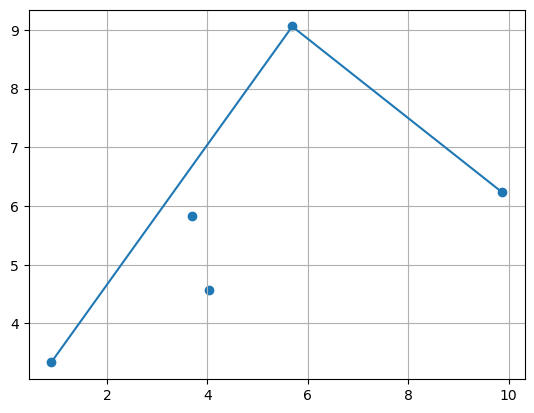

In [88]:
stack = convexhull(pt)
xhull = [i[0] for i in stack]
yhull = [i[1] for i in stack]
plt.scatter(xpts,ypts)
plt.plot(xhull, yhull)
plt.grid()

[array([ 0.88842734, -3.3353408 ]), array([ 3.68346278, -5.82711482]), array([ 4.03085347, -4.57733507])]
[array([ 0.88842734, -3.3353408 ]), array([ 3.68346278, -5.82711482]), array([ 4.03085347, -4.57733507])]
[ 4.03085347 -4.57733507]
False
[array([ 0.88842734, -3.3353408 ]), array([ 4.03085347, -4.57733507]), array([ 5.688529  , -9.05853965])]
[array([ 0.88842734, -3.3353408 ]), array([ 4.03085347, -4.57733507]), array([ 5.688529  , -9.05853965])]
[ 5.688529   -9.05853965]
True
[array([ 4.03085347, -4.57733507]), array([ 5.688529  , -9.05853965]), array([ 9.8661164, -6.2350118])]
[array([ 0.88842734, -3.3353408 ]), array([ 4.03085347, -4.57733507]), array([ 9.8661164, -6.2350118])]
[ 9.8661164 -6.2350118]
False


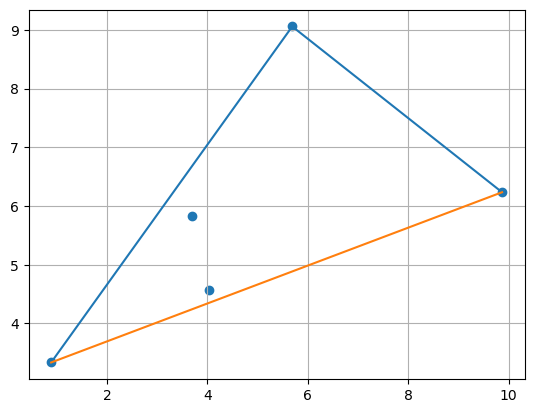

In [91]:
ptsinv = np.array(list(zip(xpts,-ypts)))
ptinv = np.array(sorted(ptsinv, key = lambda k:[k[0]]))
stackinv = convexhull(ptinv)
# stack = convexhull(pt)
xhull = [i[0] for i in stack]
yhull = [i[1] for i in stack]
xhulli = [i[0] for i in stackinv]
yhulli = [-i[1] for i in stackinv]
plt.scatter(xpts,ypts)
plt.plot(xhull, yhull)
plt.plot(xhulli, yhulli)

plt.grid()